Code to compare the participants in the four moral strategy groups on demographics, SVO, guilt inventory, etc.

In [2]:
import sys, os, glob, matplotlib, scipy
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as ss

base_dir = '/project/3014018.02/analysis_mri/DataSharingCollection/'

## Load clusters

In [3]:
fittedParams = pd.read_csv(os.path.join(base_dir,
    'Results/2.Behavior-ClusterModel/ParticipantClustering.csv'),index_col=0)
print fittedParams['ClustName'].value_counts()

IA    24
MO    21
GR     7
GA     5
Name: ClustName, dtype: int64


## Gender and age

In [4]:
genderAge = pd.read_csv(os.path.join(base_dir,'Data/3.Demographics/GenderAge.csv'),header=None,index_col=None)
genderAge.columns = ['sub','gender','age'] # M = 1, F = 2
genderAge = genderAge.merge(fittedParams[['sub','ClustName']],on='sub')
genderAge.head()

,sub,gender,age,ClustName
0,124,1,19,GR
1,126,2,19,MO
2,128,1,22,IA
3,129,1,20,MO
4,130,1,25,MO


/home/decision/jervbaa/.conda/envs/hmtg_fmri_nc/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


F_onewayResult(statistic=1.6466185773560182, pvalue=0.18968360206885365)


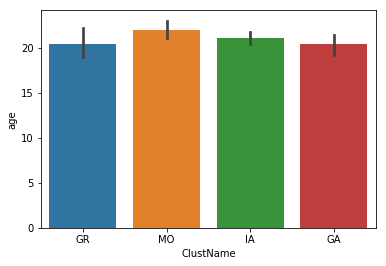

In [5]:
measure = 'age'
sns.barplot(data=genderAge,x='ClustName',y=measure)
dat = [genderAge.loc[genderAge['ClustName']==clust,measure].values for clust in ['GR','GA','IA','MO']]
print scipy.stats.f_oneway(dat[0],dat[1],dat[2],dat[3])

In [6]:
measure = 'gender'
dat = genderAge[['sub',measure,'ClustName']].groupby([measure,'ClustName']).count().unstack()
chi2,p,dof,exp = scipy.stats.chi2_contingency(dat)
print chi2,dof,p

2.0510836385836386 3 0.561872082640984


## SVO

In [7]:
SVOs = pd.read_csv(os.path.join(base_dir,'Data/1.TaskBehavior/SVO.csv'),header=None,index_col=None)
SVOs.columns = ['sub','SVO','prosocial']
SVOs = SVOs.merge(fittedParams[['sub','ClustName']],on='sub')
SVOs.head()

,sub,SVO,prosocial,ClustName
0,124,37.685,1,GR
1,126,24.463,1,MO
2,128,41.582,1,IA
3,129,40.799,1,MO
4,130,32.283,1,MO


F_onewayResult(statistic=5.84167881865755, pvalue=0.001592987274028858)


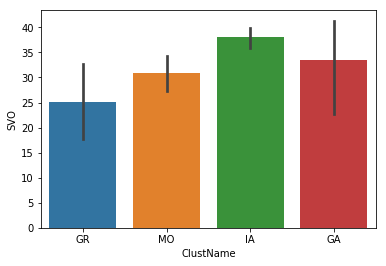

In [8]:
measure = 'SVO'
sns.barplot(data=SVOs,x='ClustName',y=measure)
dat = [SVOs.loc[SVOs['ClustName']==clust,measure].values for clust in ['GR','GA','IA','MO']]
print scipy.stats.f_oneway(dat[0],dat[1],dat[2],dat[3])

In [9]:
# Pairwise comps
pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
groups = ['GR','GA','IA','MO']
for pair in pairs:
    groupPair = [groups[i] for i in pair]
    print groupPair
    dat = [SVOs.loc[SVOs['ClustName']==clust,measure].values for clust in groupPair]
    stats = scipy.stats.ttest_ind(dat[0],dat[1])
    df = len(dat[0])+len(dat[1])-2
    print 't = %.2f, df = %i, p = %.4f, p_corr = %.4f'%(stats[0],df,stats[1],stats[1]*len(pairs))

['GR', 'GA']
t = -1.27, df = 10, p = 0.2344, p_corr = 1.4063
['GR', 'IA']
t = -4.45, df = 29, p = 0.0001, p_corr = 0.0007
['GR', 'MO']
t = -1.42, df = 26, p = 0.1686, p_corr = 1.0118
['GA', 'IA']
t = -1.36, df = 27, p = 0.1845, p_corr = 1.1068
['GA', 'MO']
t = 0.59, df = 24, p = 0.5625, p_corr = 3.3749
['IA', 'MO']
t = 3.43, df = 43, p = 0.0014, p_corr = 0.0082


## Guilt inventory

In [10]:
GIs = pd.read_csv(os.path.join(base_dir,'Data/2.Questionnaire/GI.csv'),header=None,index_col=None)
GIs.columns = ['sub','state','standards','trait']
GIs = GIs.merge(fittedParams[['sub','ClustName']],on='sub')
GIs.head()

,sub,state,standards,trait,ClustName
0,124,20,49,40,GR
1,126,20,36,28,MO
2,128,24,34,54,IA
3,129,19,45,52,MO
4,130,30,45,60,MO


state
F_onewayResult(statistic=0.37232541083215276, pvalue=0.7732860458040419)


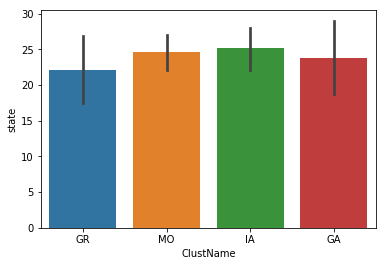

standards
F_onewayResult(statistic=0.9782176703205665, pvalue=0.41003410714999367)


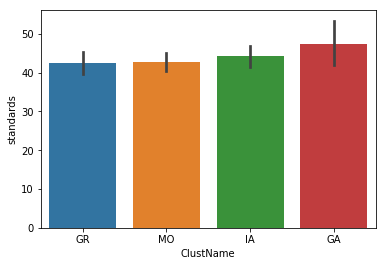

trait
F_onewayResult(statistic=1.2274307238799211, pvalue=0.3088812730922844)


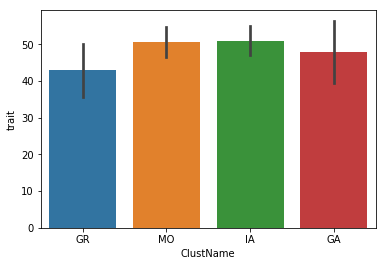

In [11]:
for measure in ['state','standards','trait']:
    print measure
    sns.barplot(data=GIs,x='ClustName',y=measure)
    dat = [GIs.loc[GIs['ClustName']==clust,measure].values for clust in ['GR','GA','IA','MO']]
    print scipy.stats.f_oneway(dat[0],dat[1],dat[2],dat[3])
    plt.show()

## Choice consistency (from cross-validation on model)

In [12]:
CVs = pd.read_csv(os.path.join(base_dir,'Results/1.Behavior-FitModels/CV_k-folds_true_results.csv'),index_col=0)
CVs = CVs.merge(fittedParams[['sub','ClustName']],on='sub')
CVs.head()

,sub,SSE,MSE,r,rsq,ClustName
0,124,83.0,1.092105,0.955983,0.913903,GR
1,126,259.0,3.407895,0.953970,0.910059,MO
2,128,255.0,3.355263,0.976844,0.954224,IA
3,129,229.0,3.013158,0.962628,0.926653,MO
4,130,473.0,6.223684,0.917563,0.841923,MO


SSE
F_onewayResult(statistic=0.37669145725343234, pvalue=0.7701643284529256)


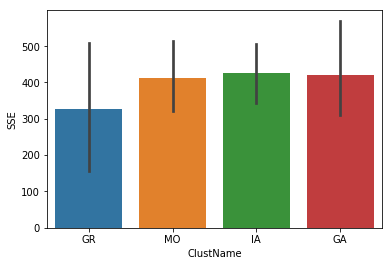

In [13]:
for measure in ['SSE']:
    print measure
    sns.barplot(data=CVs,x='ClustName',y=measure)
    dat = [CVs.loc[CVs['ClustName']==clust,measure].values for clust in ['GR','GA','IA','MO']]
    print scipy.stats.f_oneway(dat[0],dat[1],dat[2],dat[3])
    plt.show()

## Choice consistency (as overall model misfit)

In [14]:
SSEs = fittedParams[['sub','SSE','ClustName']]

SSE
F_onewayResult(statistic=0.6817053130338997, pvalue=0.5671581281295366)


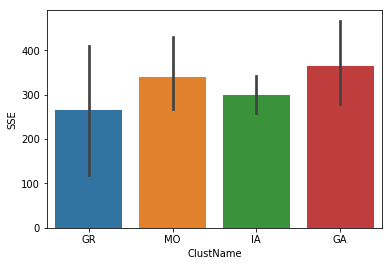

In [74]:
for measure in ['SSE']:
    print measure
    sns.barplot(data=SSEs,x='ClustName',y=measure)
    dat = [SSEs.loc[SSEs['ClustName']==clust,measure].values for clust in ['GR','GA','IA','MO']]
    print scipy.stats.f_oneway(dat[0],dat[1],dat[2],dat[3])
    plt.show()

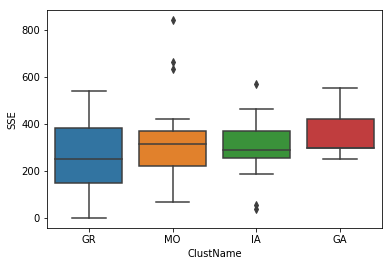

In [75]:
sns.boxplot(data=SSEs,x='ClustName',y=measure)

(array([ 1.,  0.,  4.,  0.,  4., 22., 15.,  5.,  5.,  1.]),
 array([0.        , 0.33245498, 0.66490997, 0.99736495, 1.32981993,
        1.66227492, 1.9947299 , 2.32718488, 2.65963986, 2.99209485,
        3.32454983]),
 <a list of 10 Patch objects>)

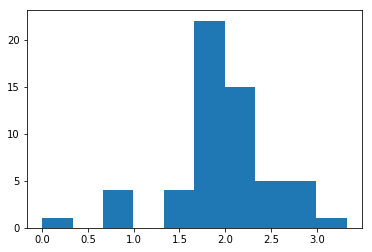

In [16]:
plt.hist(np.sqrt(SSEs['SSE']/76))

## Tabulate all individual differences (supp table 1)

In [37]:
allDiffs = genderAge.merge(SVOs,on=['sub','ClustName']).merge(GIs,on=['sub','ClustName']).merge(
    SSEs,on=['sub','ClustName']).merge(fittedParams[['sub','theta','phi']],on='sub')
allDiffs = allDiffs[['ClustName','gender','age','SVO','prosocial','state','standards','trait',
                     'theta','phi','SSE']]
allDiffs.head()

,ClustName,gender,age,SVO,prosocial,state,standards,trait,theta,phi,SSE
0,GR,1,19,37.685,1,20,49,40,0.340718,0.055082,65.0
1,MO,2,19,24.463,1,20,36,28,0.078473,0.000799,205.0
2,IA,1,22,41.582,1,24,34,54,0.030199,0.059205,255.0
3,MO,1,20,40.799,1,19,45,52,0.206195,-0.095803,203.0
4,MO,1,25,32.283,1,30,45,60,0.078536,-0.017041,323.0


In [38]:
descriptives = allDiffs.groupby('ClustName').describe().T
descriptives.to_csv(os.path.join(base_dir,'Results/2.Behavior-ClusterModel/ClusterDescriptives.csv'))

In [39]:
allDiffs[['ClustName','gender']].groupby(['ClustName','gender']).size()

ClustName  gender
GA         1          3
           2          2
GR         1          2
           2          5
IA         1          7
           2         17
MO         1          6
           2         15
dtype: int64

In [40]:
allDiffs.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,57.0,1.684211,0.468961,1.000000,1.000000,2.000000,2.000000,2.000000
age,57.0,21.280702,2.085275,18.000000,20.000000,21.000000,23.000000,26.000000
SVO,57.0,33.398246,9.003912,11.622000,29.745000,35.575000,41.410000,43.808000
prosocial,57.0,0.859649,0.350438,0.000000,1.000000,1.000000,1.000000,1.000000
state,57.0,24.438596,6.617125,13.000000,19.000000,23.000000,29.000000,39.000000
standards,57.0,43.701754,6.073846,30.000000,39.000000,44.000000,47.000000,60.000000
trait,57.0,49.578947,10.513507,28.000000,42.000000,48.000000,57.000000,83.000000
theta,57.0,0.146528,0.125008,0.004283,0.057725,0.109224,0.206195,0.492593
phi,57.0,-0.010273,0.065032,-0.099693,-0.087336,0.000459,0.041354,0.098527
SSE,57.0,315.859649,153.830198,0.000000,235.000000,294.000000,384.000000,840.000000


## Plot parameter space with SSE as third dimension

In [41]:
plotDat = allDiffs[['theta','phi','SSE']].copy()
plotDat.head()

,theta,phi,SSE
0,0.340718,0.055082,65.0
1,0.078473,0.000799,205.0
2,0.030199,0.059205,255.0
3,0.206195,-0.095803,203.0
4,0.078536,-0.017041,323.0


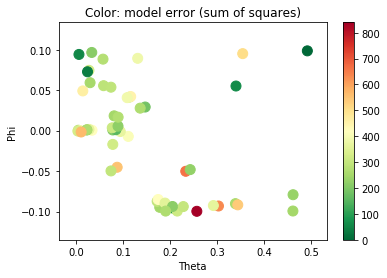

In [73]:
cm = plt.cm.get_cmap('RdYlGn_r')
x = plotDat.theta
y = plotDat.phi
z = plotDat.SSE
sc = plt.scatter(x, y, c=z, s=100, cmap=cm)
plt.colorbar(sc,)
plt.xlabel('Theta'); plt.ylabel('Phi');
plt.title('Color: model error (sum of squares)')
# plt.savefig(os.path.join(base_dir,'Results/2.ClusterModel/SSE_across_paramSpace.pdf'),
#             bbox_inches='tight')
plt.show()

##### Supp fig 8

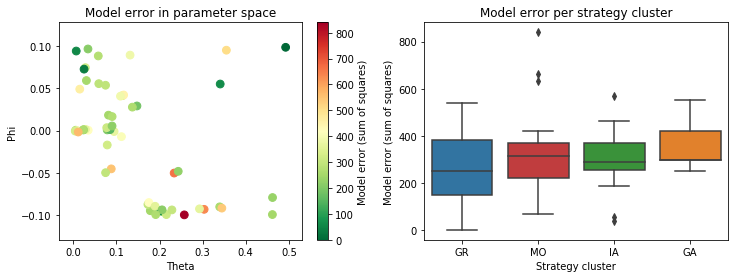

In [110]:
fig,ax = plt.subplots(1,2,figsize=[12,4])
sc = ax[0].scatter(x, y, c=z, s=60, cmap=cm)
plt.colorbar(sc,ax=ax[0],label='Model error (sum of squares)')
ax[0].set_xlabel('Theta'); ax[0].set_ylabel('Phi');
ax[0].set_title('Model error in parameter space')
sns.boxplot(data=SSEs,x='ClustName',y=measure,ax=ax[1],
            palette=[sns.color_palette('tab10',4)[i] for i in [0,3,2,1]])
# ax[1].set_xlabel('Strategy cluster')
ax[1].set(xlabel = 'Strategy cluster', ylabel='Model error (sum of squares)',
         title = 'Model error per strategy cluster');
plt.savefig(os.path.join(base_dir,'Results/2.ClusterModel/SSE_across_paramsClusters.pdf'),
            bbox_inches='tight')